In [1]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [2]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [3]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit
import csv
from scipy.integrate import simps

# Importing data

In [4]:
# All synonymous variants in Grail
filename="Grail_controls_synonymous_SNV.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_synonymous_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_synonymous_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_synonymous = sorted(Razavi_synonymous_results.items(), key=lambda x: x[1][1], reverse=True)

# All missense variants in Grail
filename="Grail_controls_missense_SNV.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_missense_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_missense_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_missense = sorted(Razavi_missense_results.items(), key=lambda x: x[1][1], reverse=True)

# top 20 variants in Grail
filename="Grail_controls_top20_variant_untrimmed_VAF.csv"
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0
    Razavi_top20_results={} 
    
    for row in read_reader:
        if True: #ignore the header of the CSV file
            VAF = row[0]

            Razavi_top20_results[row_count]=(0, VAF, 0, 0, 0, 0)

        row_count=row_count+1

Razavi_top20 = sorted(Razavi_top20_results.items(), key=lambda x: x[1][1], reverse=True)

        
filename='Ahmet_silent_calls.csv'

Bolton_synonymous={}
list_of_syn_vaf=[]
untreated_patients={}
all_patients={}
                
with open(filename) as data:
    
    reader = csv.DictReader(data,delimiter=',')
    row_count = 0

    for row in reader:

        patient_id=str(row['DMP_PATIENT_ID'])
        gene=str(row['Gene'])
        variant_class=str(row['VariantClass'])
        vaf=float(row['N_AltFreq'])
        therapy_status=str(row['therapy_binary'])
        age=str(row['age'])
        
            
        all_patients[patient_id] =  age   #ages of some treated patients are unavailable
        
        if therapy_status=='untreated':
            
            #ages of all untreated patients are available
            if age=='NA':
                print('age unavailable')
                age=0
            
            untreated_patients[patient_id] =  float(age)

            if variant_class=='Silent':
            
                list_of_syn_vaf.append(vaf)
                Bolton_synonymous[row_count]=vaf
                
        row_count = row_count + 1
           

n_untreated_patient_Bolton=len(untreated_patients.keys())
print('total no. of synonymous variants in Bolton untreated patients is', len(Bolton_synonymous.keys()))
# print('total number of synonymous variants is', len(list_of_syn_vaf))
# print('total number of all patients is', len(all_patients.keys()))
# print('total number of untreated patients is', len(untreated_patients.keys()))

total no. of synonymous variants in Bolton untreated patients is 221


In [5]:
filename3='Grail_ages.csv'

list_of_control_ages_Razavi=[]
with open(filename3,'r') as csvfile:
    read_reader = csv.DictReader(csvfile, delimiter=',')
    
    for row in read_reader:
        
        status= str(row['tissue'])
        age=int(row['age'])
        
        if status == 'Control':
            list_of_control_ages_Razavi.append(age)
            
print('There are', len(list_of_control_ages_Razavi), 'controls in Razavi 2019')

list_of_control_ages_Bolton=list(untreated_patients.values())
print('There are', len(list_of_control_ages_Bolton), 'untreated controls in Zehir')

list_of_control_ages = list_of_control_ages_Razavi + list_of_control_ages_Bolton
# list_of_control_ages = list_of_control_ages_Razavi 
print('mean of Razavi+Bolton ages:',np.mean(list_of_control_ages),'std of Razavi+Bolton ages:', np.std(list_of_control_ages))
print('mean of Razavi ages:',np.mean(list_of_control_ages_Razavi),'std of Razavi ages:',np.std(list_of_control_ages_Razavi))
print('mean of Bolton ages:',np.mean(list_of_control_ages_Bolton),'std of Bolton ages:',np.std(list_of_control_ages_Bolton))


There are 47 controls in Razavi 2019
There are 590 untreated controls in Zehir
mean of Razavi+Bolton ages: 66.64081922291993 std of Razavi+Bolton ages: 12.106963339126546
mean of Razavi ages: 57.808510638297875 std of Razavi ages: 15.860614001519801
mean of Bolton ages: 67.34440990677966 std of Bolton ages: 11.467621235719768


# Trimming synonymous variant data

In [6]:

phi=2*10**-3
# Razavi_synonymous_trimmed_below_phi_list = []

Razavi_synonymous_trimmed_list = []
Razavi_missense_trimmed_list = []

Razavi_upper_limit = 0.2
Razavi_lower_limit = 0.0005

for (row_count,  VAF) in Razavi_synonymous:
    if Razavi_lower_limit<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_synonymous_trimmed_list.append(float(VAF[1]))
        
for (row_count,  VAF) in Razavi_missense:
    if Razavi_lower_limit<=float(VAF[1])<=Razavi_upper_limit:
        Razavi_missense_trimmed_list.append(float(VAF[1]))        

        
        


# Normalize VAF densities

In [7]:

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

In [9]:
Razavitotal = 47
Boltontotal = 590

Razavi_panel_size = 2130*10**3 
Bolton_panel_size = 1139322  # bp

nonsynonymous_mu_per_bp = 1.3617021276595745e-09
synonymous_mu_per_bp = 5.390070921985816e-10
mu_per_bp = 1.9007092198581563e-09

Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_synonymous_mu = synonymous_mu_per_bp*Bolton_panel_size
Bolton_nonsynonymous_mu = nonsynonymous_mu_per_bp*Bolton_panel_size

syn_total_mut_sites_ratio = 0.2835820895522388
number_of_developmental_mut = 0.6  # per haploid per doubling
haploid_genome_size = 3*10**9

Razavi_dev_per_doubling_synonymous_mu = number_of_developmental_mut/haploid_genome_size*Razavi_panel_size*syn_total_mut_sites_ratio
Bolton_dev_per_doubling_synonymous_mu = number_of_developmental_mut/haploid_genome_size*Bolton_panel_size*syn_total_mut_sites_ratio
print('Razavi_dev_per_doubling_synonymous_mu', Razavi_dev_per_doubling_synonymous_mu)
print('Bolton_dev_per_doubling_synonymous_mu', Bolton_dev_per_doubling_synonymous_mu)

Razavi_dev_per_doubling_synonymous_mu_LeeSix = 1.84/haploid_genome_size*Razavi_panel_size*syn_total_mut_sites_ratio
Bolton_dev_per_doubling_synonymous_mu_LeeSix = 1.84/haploid_genome_size*Bolton_panel_size*syn_total_mut_sites_ratio
print('Razavi_dev_per_doubling_synonymous_mu_LeeSix', Razavi_dev_per_doubling_synonymous_mu_LeeSix)
print('Bolton_dev_per_doubling_synonymous_mu_LeeSix', Bolton_dev_per_doubling_synonymous_mu_LeeSix)

Razavi_dev_per_doubling_synonymous_mu 0.0001208059701492537
Bolton_dev_per_doubling_synonymous_mu 6.461826268656716e-05
Razavi_dev_per_doubling_synonymous_mu_LeeSix 0.00037047164179104477
Bolton_dev_per_doubling_synonymous_mu_LeeSix 0.00019816267223880598


In [10]:

binmethod = 'doane'
Razavi_synonymous_bins = 16
Razavi_missense_bins = 16


# ***** this goes into the fitting
# Razavi_bins_below_phi = 11
Razavi_bins_below_phi = 6


In [11]:
print('mutation rate across haploid genome',3*7.60E-05/(141*10**3)*3*10**9)
print('mutation rate in coding region across haploid genome',0.02*3*7.60E-05/(141*10**3)*3*10**9)

mutation rate across haploid genome 4.851063829787234
mutation rate in coding region across haploid genome 0.09702127659574468


# Neutral drift

In [12]:
def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

def logProbtheory_actual_ages_single(l, N_tau, list_of_control_ages, u_norm):
    
    density = 0
    
    for i in range(len(list_of_control_ages)):
        t = list_of_control_ages[i]
        density = density + 2*u_norm*N_tau*np.exp(-2*N_tau/(t)*(np.exp(l)/(1-2*np.exp(l))))/len(list_of_control_ages)
    
    
    return np.log(density)

def linProbtheory_actual_ages_single(l, N_tau, list_of_control_ages, u_norm):
    
    density = 0
    
    for i in range(len(list_of_control_ages)):
        t = list_of_control_ages[i]
        density = density + 2*u_norm*N_tau*np.exp(-2*N_tau/(t)*(np.exp(l)/(1-2*np.exp(l))))/len(list_of_control_ages)
    
    
    return density


# Confidence levels

In [17]:

def squared_distance_calculation_driftpopsize_cumulative_weightedbyerror_with_cutoff(params, data, study_total, list_of_ages, lmin, lmax, n_bins): 
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"   
    N_tau = params[0]
    
    u_norm = params[1]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        logfreq = datapoint[0] 

        data_density = datapoint[1]
        
        num_data = datapoint[4]
        
        cumulative_num_data = cumulative_num_data + num_data
        
        predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_single(l, N_tau, list_of_ages, u_norm)\
                                                    )/bin_size,\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        
        predicted_cumulative_density = predicted_cumulative_density + predicted_density

        
        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             upper_sigma_log = datapoint[3] 
#             lower_sigma_log = datapoint[2] 
#             sigma=(upper_sigma_log-lower_sigma_log)
            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value)
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)
#             print('sigma_cumulative', sigma_cumulative)

            total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error


#             total_square_distance = total_square_distance + square_distance/sigma**2  # weighted by error
#             total_square_distance = total_square_distance + square_distance  # not weighted by error
        else:
            pass
#             print('data density is zero')
     
    return total_square_distance

def squared_distance_calculation_both_data_combined(params, data_1, study_total_1, list_of_ages_1, lmin_1, lmax_1, n_bins_1, data_2, study_total_2, list_of_ages_2, lmin_2, lmax_2, n_bins_2): 
    
    N_tau_drift = params[0]
    
    mut_1 = params[1]
    
    mut_2 = params[2]
    
    result_1 = squared_distance_calculation_driftpopsize_cumulative_weightedbyerror_with_cutoff([N_tau_drift, mut_1], data_1, study_total_1, list_of_ages_1, lmin_1, lmax_1, n_bins_1)
    
    result_2 = squared_distance_calculation_driftpopsize_cumulative_weightedbyerror_with_cutoff([N_tau_drift, mut_2], data_2, study_total_2, list_of_ages_2, lmin_2, lmax_2, n_bins_2)
     
    return result_1 + result_2



In [18]:
# function from simulation validation

def VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

#     list_SD=[]
#     for i in list(hist_without_zero):
#         list_SD.append(1/math.sqrt(i))
#     print('SD:', list_SD)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
#     for i in list_SD:
#         SD.append(i)
    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)

#     list_SD=[]
#     for i in list(hist_without_zero):
#         list_SD.append(1/math.sqrt(i))
#     print('SD:', list_SD)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
#     for i in list_SD:
#         SD.append(i)
    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities



In [19]:
# code from simulation validation
log_phi=np.log(phi)
lmax=np.log(0.499)
lmin=np.log(0.05/100)

# Razavi
Razavi_VAF_info_syn = VAF_densities_list_simulation_SD(Razavi_synonymous_trimmed_list, Razavitotal, \
                                                                Razavi_bins_below_phi, lmin, log_phi)

Razavi_VAF_info_syn_cumulative = cumulative_VAF_densities_list_simulation_SD(Razavi_synonymous_trimmed_list, Razavitotal,\
             
                                                                                      Razavi_bins_below_phi, lmin, log_phi)

Razavi_VAF_info_missense = VAF_densities_list_simulation_SD(Razavi_missense_trimmed_list, Razavitotal, \
                                                                Razavi_bins_below_phi, lmin, log_phi)

Razavi_VAF_info_missense_cumulative = cumulative_VAF_densities_list_simulation_SD(Razavi_missense_trimmed_list, Razavitotal, \
             
                                                                                      Razavi_bins_below_phi, lmin, log_phi)


bin_centres 5
bin_centres_without_zero 5
lower error: [0.05331366360713918, 0.06254999956743701, 0.07221946573644722, 0.09925819304007755, 0.1394792299700245]
upper error: [0.05061460663797401, 0.05886675415114073, 0.06735327608527397, 0.0902895230573173, 0.12238479661072432]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.05331366360713918, 0.06254999956743701, 0.07221946573644722, 0.09925819304007755, 0.1394792299700245]
upper error: [0.05061460663797401, 0.05886675415114073, 0.06735327608527397, 0.0902895230573173, 0.12238479661072432]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.03386330196990173, 0.04309797224054179, 0.04996472247004524, 0.06745777246746876, 0.08547422307290864]
upper error: [0.032754039515616284, 0.04131702786954694, 0.04758660006507798, 0.06319337368101152, 0.07874019089156459]
bin_centres 5
bin_centres_without_zero 5
lower error: [0.03386330196990173, 0.04309797224054179, 0.04996472247004524, 0.06745777246746876, 0.08547422307290864]
upper 

In [20]:
Razavi_VAF_info_syn_cumulative

[(-7.462273023430093,
  3.348858113353196,
  0.05331366360713918,
  0.05061460663797401,
  371),
 (-7.185014151206115,
  3.038458117041758,
  0.06254999956743701,
  0.05886675415114073,
  272),
 (-6.907755278982137,
  2.760532219535342,
  0.07221946573644722,
  0.06735327608527397,
  206),
 (-6.630496406758159,
  2.1511549220408552,
  0.09925819304007755,
  0.0902895230573173,
  112),
 (-6.3532375345341805,
  1.5101934946514801,
  0.1394792299700245,
  0.12238479661072432,
  59)]

In [21]:
# 3 parameter:  N tau and mut rate (cumulative)
import scipy

initial_guess=[60000, Razavi_synonymous_mu, Razavi_synonymous_mu]
print('initial guess:', initial_guess)
outcome=scipy.optimize.minimize(squared_distance_calculation_both_data_combined, initial_guess, \
                                args=(Razavi_VAF_info_syn_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi,\
                                                Razavi_VAF_info_missense_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi), method='nelder-mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} \
                               )
print('Success of fitting outcome is', outcome.success)

print('best-fit values for driver mutation rate:',  outcome.x)

inferred_N_tau_drift = outcome.x[0]
inferred_syn_mut = outcome.x[1]
inferred_missense_mut = outcome.x[2]

initial guess: [60000, 0.001148085106382979, 0.001148085106382979]
Success of fitting outcome is True
best-fit values for driver mutation rate: [4.86643672e+04 8.10075211e-04 1.77068369e-03]


In [56]:
scale=1.2

def confidence_interval_95_N_tau(x1, y1, z1, p1, gene_color): #95% confidence interval for N tau
    
    list_x1=[]
    for index in range(len(x1)):
        list_x1.append(x1[index])
#     list_x1.reverse()
    x1=np.array(list_x1)
    
    N_tau_list = []
    total_prob_array=np.array([0.0 for i in range(len(x1))])
    for N_tau_index in range(len(x1)):
        N_tau_list.append(x1[N_tau_index])
        prob_2D=0
        for m in range(len(y1)):
            for n in range(len(z1)):
                prob_2D=prob_2D+p1[n][m][N_tau_index]
                
        total_prob_array[N_tau_index] = prob_2D
    print('total_prob_array', total_prob_array)
#     N_tau_list.reverse()

    total_prob=sum(total_prob_array)
    print('total_prob:', total_prob)
    normalized_prob_array=total_prob_array/total_prob
    print('normalized_prob_array:', normalized_prob_array.shape)
    normalized_prob_array_list=[]
    for i in normalized_prob_array:
        normalized_prob_array_list.append(i)
    cumulative_prob=0.0

    N_tau_95_range=[]
    N_tau_50_range=[]
    N_tau_range_probs = []
    N_tau_cumulative_prob_95_range=[]
    for N_tau, p in zip(x1, normalized_prob_array):
        N_tau_range_probs.append((N_tau,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.5<cumulative_prob:
            N_tau_50_range.append(N_tau)
        if 0.05<cumulative_prob<0.95:
            N_tau_95_range.append(N_tau)
            N_tau_cumulative_prob_95_range.append((N_tau, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_N_tau=min(N_tau_95_range)
    max_N_tau=max(N_tau_95_range)
    N_tau_mle=min(N_tau_50_range)
    
    print('95% confidence interval for N_tau: lower N_tau =', min_N_tau)
    print('95% confidence interval for N_tau: upper N_tau =', max_N_tau)
    print('MLE for N_tau: upper N_tau =', N_tau_mle)
    

    print('N_tau_list length:', len(N_tau_list))
    print('normalized_prob_array_list length:', len(normalized_prob_array_list))
#     print('N_tau_list',N_tau_list)
    ax1.plot(N_tau_list, normalized_prob_array_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_N_tau, min_N_tau], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_N_tau, max_N_tau], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([N_tau_mle, N_tau_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    mins = min(N_tau_list)-0.5
    maxs = max(N_tau_list)+0.5
    ax1.set_ylim(0, (max(normalized_prob_array_list)+0.01))
    ax1.set_xlim(mins, maxs)

    # Axis labels
    ax1.set_xlabel(r'$N \tau$', fontsize = 20, labelpad = 10, fontweight = 'medium')
    ax1.set_ylabel('probability', fontsize = 20, labelpad = 10, fontweight = 'medium')

    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1

def confidence_interval_95_mut(x1, y1, z1, p1, gene_color): #95% confidence interval for mut
    
    list_x1=[]
    for index in range(len(x1)):
        list_x1.append(x1[index])
#     list_x1.reverse()
    x1=np.array(list_x1)
    
    mut_list = []
    total_prob_array=np.array([0.0 for i in range(len(x1))])
    for mut_index in range(len(x1)):
        mut_list.append(x1[mut_index])
        prob_2D=0
        for m in range(len(y1)):
            for n in range(len(z1)):
                prob_2D=prob_2D+p1[n][m][mut_index]
                
        total_prob_array[mut_index] = prob_2D
    print('total_prob_array', total_prob_array)
#     N_tau_list.reverse()

    total_prob=sum(total_prob_array)
    print('total_prob:', total_prob)
    normalized_prob_array=total_prob_array/total_prob
    print('normalized_prob_array:', normalized_prob_array.shape)
    normalized_prob_array_list=[]
    for i in normalized_prob_array:
        normalized_prob_array_list.append(i)
    cumulative_prob=0.0

    mut_95_range=[]
    mut_50_range=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for mut, p in zip(x1, normalized_prob_array):
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.5<cumulative_prob:
            mut_50_range.append(mut)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    mut_mle=min(mut_50_range)
    
    print('95% confidence interval for mut: lower mut =', min_mut)
    print('95% confidence interval for mut: upper mut =', max_mut)
    print('MLE for mut: upper mut =', mut_mle)
    

    print('mut_list length:', len(mut_list))
    print('normalized_prob_array_list length:', len(normalized_prob_array_list))
#     print('N_tau_list',N_tau_list)
    ax1.plot(mut_list, normalized_prob_array_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

#     # Set axis limits
#     mins = min(mut_list)-0.5
#     maxs = max(mut_list)+0.5
#     ax1.set_ylim(0, (max(normalized_prob_array_list)+0.01))
#     ax1.set_xlim(mins, maxs)

    # Axis labels
    ax1.set_xlabel(r'$\mu$', fontsize = 20, labelpad = 10, fontweight = 'medium')
    ax1.set_ylabel('probability', fontsize = 20, labelpad = 10, fontweight = 'medium')

    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1

total_prob_array [4.27808435e-11 1.21098806e-10 3.35689275e-10 9.11722390e-10
 2.42728884e-09 6.33678458e-09 1.62243150e-08 4.07324964e-08
 1.00220879e-07 2.41443555e-07 5.68809746e-07 1.30850852e-06
 2.93494233e-06 6.41035808e-06 1.36229027e-05 2.81649300e-05
 5.66929119e-05 1.11293873e-04 2.13614506e-04 4.02044202e-04
 7.43933401e-04 1.35534891e-03 2.43047814e-03 4.28053086e-03
 7.37757586e-03 1.23942441e-02 2.02311382e-02 3.20369323e-02
 4.92517310e-02 7.37246702e-02 1.07934056e-01 1.55237546e-01
 2.19920831e-01 3.06715500e-01 4.19604690e-01 5.60217034e-01
 7.26705885e-01 9.14167315e-01 1.11685336e+00 1.33086963e+00
 1.55489896e+00 1.78725223e+00 2.02045227e+00 2.23761030e+00
 2.41494364e+00 2.53064189e+00 2.57465135e+00 2.55199262e+00
 2.47672413e+00 2.36138211e+00 2.21063762e+00 2.02398646e+00
 1.80401800e+00 1.56206816e+00 1.31617110e+00 1.08363452e+00
 8.74864353e-01 6.92743691e-01 5.36300291e-01 4.04366644e-01
 2.96503830e-01 2.11834714e-01 1.47980535e-01 1.01284601e-01
 6.7844

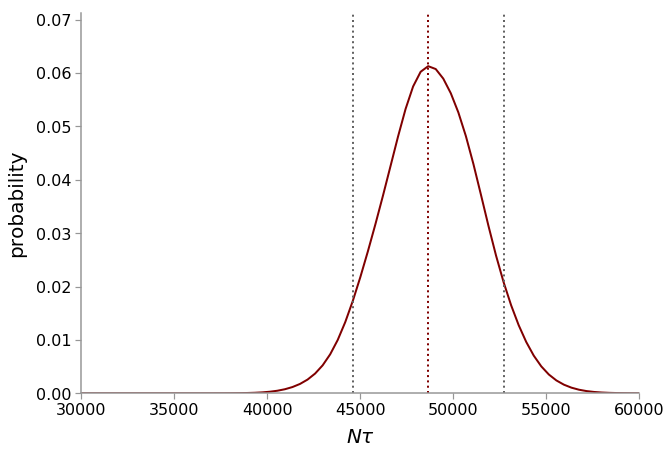

In [52]:
#Plot the distributions
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(10, 7))


N_tau_list=np.linspace(30000, 60000, 75)
mut_1_list=np.linspace(inferred_syn_mut*0.1, inferred_syn_mut*2, 50)
mut_2_list=np.linspace(inferred_missense_mut*0.1, inferred_missense_mut*2, 50)

axisfont=17
titlefont=20
axislabelfont=21
tpfont = 14
m_size=8

#MLE for increased mutation rate

# cubed_distance_N_tau_even_less_range = np.array([[[squared_distance_calculation_both_data_combined([N_tau, mut_1, mut_2],Razavi_VAF_info_syn_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi,\
#                                                 Razavi_VAF_info_missense_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi) for N_tau in N_tau_list] for mut_1 in mut_1_list] for mut_2 in mut_2_list])
# print('cubed_distance_N_tau_even_less_range', cubed_distance_N_tau_even_less_range)

# Plot the density map using nearest-neighbor interpolation
logProbs_N_tau = (-cubed_distance_N_tau_even_less_range)
max_x, max_y, max_z = np.unravel_index(np.argmax(logProbs_N_tau), logProbs_N_tau.shape)
p_max = logProbs_N_tau[max_x, max_y, max_z]
p1_N_tau = np.exp(logProbs_N_tau-(p_max))
# print('z1_s', z1_s)


mg_N_tau, mg_mut_1, mg_mut_2 = np.meshgrid(N_tau_list, mut_1_list, mut_2_list)
ax1= confidence_interval_95_N_tau(N_tau_list, mut_1_list, mut_2_list, p1_N_tau, 'maroon')


# plt.savefig('3DMLE_drift_population_size_missense_synonymous.pdf', bbox_inches='tight')
plt.show()

total_prob_array [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.17373198e-291 3.95720190e-230 9.61267296e-182
 3.74413049e-143 2.40518278e-112 1.45202630e-087 1.17926048e-067
 1.36744951e-051 1.03436576e-038 1.32890812e-028 1.75391985e-020
 2.74195263e-014 1.80127776e-009 5.09578659e-006 2.23911517e-003
 1.52136999e-001 2.35979330e+000 1.35559859e+001 2.09257022e+001
 1.92067560e+001 7.49657555e+000 1.88722997e+000 2.58766610e-001
 2.32556494e-002 1.53217833e-003 5.66199032e-005 1.10792331e-006
 1.22753260e-008 6.86883271e-011 1.57210704e-013 2.77011716e-016
 2.28239345e-019 8.54713074e-023 2.51429792e-026 3.48709620e-030
 3.74238360e-034 4.01723139e-038 1.87900193e-042 7.89060654e-047
 1.42389222e-051 5.70952202e-056 6.68413652e-061 6.31227344e-066
 9.73628031e-071 5.99392540e-076]
total_prob: 65.87003619085547
normalized_prob_array: (50,)
95% confidence interval for mut: lower mut = 0.0007720512723802579
95% confidence interval for mut: upper mut 

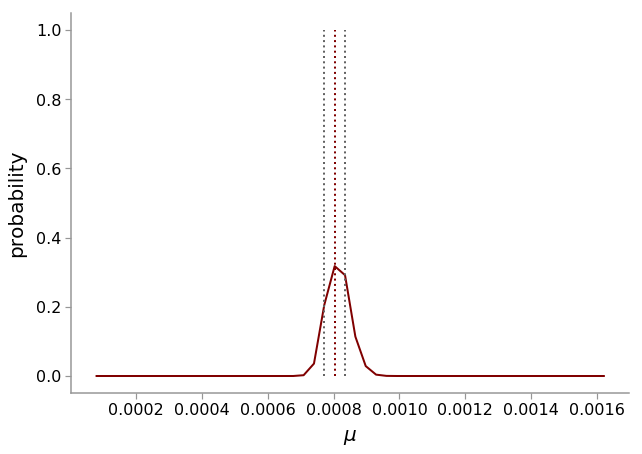

In [57]:
#Plot the distributions
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(10, 7))


N_tau_list=np.linspace(30000, 60000, 75)
mut_1_list=np.linspace(inferred_syn_mut*0.1, inferred_syn_mut*2, 50)
mut_2_list=np.linspace(inferred_missense_mut*0.1, inferred_missense_mut*2, 50)

axisfont=17
titlefont=20
axislabelfont=21
tpfont = 14
m_size=8

#MLE for increased mutation rate

# cubed_distance_mut_1 = np.array([[[squared_distance_calculation_both_data_combined([N_tau, mut_1, mut_2],Razavi_VAF_info_syn_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi,\
#                                                 Razavi_VAF_info_missense_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi) for mut_1 in mut_1_list] for N_tau in N_tau_list] for mut_2 in mut_2_list])

cubed_distance_mut_1 = np.array([[[0 for mut_1 in mut_1_list] for N_tau in N_tau_list] for mut_2 in mut_2_list])
# print('dimensions', cubed_distance_mut_1.shape() )
for N_tau_index in range(len(N_tau_list)):
    for mut_1_index in range(len(mut_1_list)):
        for mut_2_index in range(len(mut_2_list)):
            cubed_distance_mut_1[mut_2_index][N_tau_index][mut_1_index]=cubed_distance_N_tau_even_less_range[mut_2_index][mut_1_index][N_tau_index]
        
# print('cubed_distance_mut_1', cubed_distance_mut_1)


# Plot the density map using nearest-neighbor interpolation
logProbs_mut_1 = (-cubed_distance_mut_1)
max_x, max_y, max_z = np.unravel_index(np.argmax(logProbs_mut_1), logProbs_mut_1.shape)
p_max = logProbs_mut_1[max_x, max_y, max_z]
p1_mut_1 = np.exp(logProbs_mut_1-(p_max))
# print('z1_s', z1_s)


mg_mut_1, mg_N_tau, mg_mut_2 = np.meshgrid(mut_1_list, N_tau_list,  mut_2_list)
ax1= confidence_interval_95_mut(mut_1_list, N_tau_list,  mut_2_list, p1_mut_1, 'maroon')


# plt.savefig('3DMLE_drift_population_size_missense_synonymous_mut1.pdf', bbox_inches='tight')
plt.show()

total_prob_array [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.41112657e-300 2.15460793e-233 1.47433587e-179 2.14184110e-136
 5.65333714e-102 8.72802938e-075 2.06624496e-053 6.51871080e-037
 1.16243479e-024 1.07356204e-015 1.96111025e-009 4.23949878e-005
 2.30796631e-002 1.24667460e+000 1.14416273e+001 2.54609890e+001
 1.97662554e+001 6.82457351e+000 1.01572324e+000 8.69517000e-002
 4.04227072e-003 7.68512350e-005 2.93666073e-007 1.63290783e-010
 1.82181248e-014 2.74776142e-019 1.51658010e-024 1.17595240e-030
 3.21143644e-037 1.47705894e-044 2.22632166e-052 2.70458482e-060
 6.16195349e-069 5.15441142e-078 3.19407966e-087 4.01031904e-097
 4.10910284e-107 4.15709886e-117 1.43595833e-127 2.20125620e-138
 2.76871097e-149 1.56143969e-160]
total_prob: 65.87003619085552
normalized_prob_array: (50,)
95% confidence interval for mut: lower mut = 0.0016875699654022459
95% confidence interval for mut: upper mut 

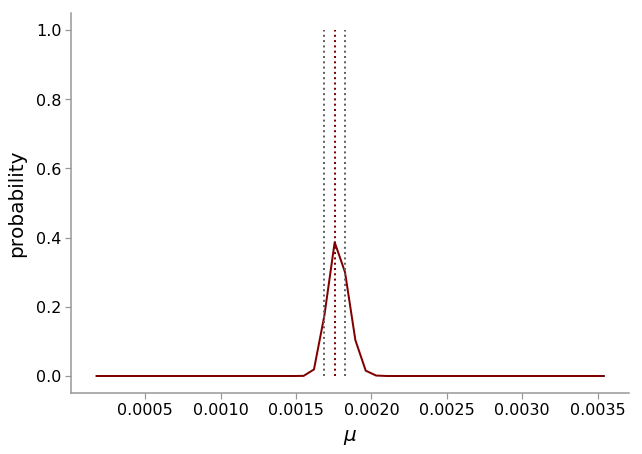

In [59]:
#Plot the distributions
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(10, 7))


N_tau_list=np.linspace(30000, 60000, 75)
mut_1_list=np.linspace(inferred_syn_mut*0.1, inferred_syn_mut*2, 50)
mut_2_list=np.linspace(inferred_missense_mut*0.1, inferred_missense_mut*2, 50)

axisfont=17
titlefont=20
axislabelfont=21
tpfont = 14
m_size=8

#MLE for increased mutation rate

# cubed_distance_mut_2 = np.array([[[squared_distance_calculation_both_data_combined([N_tau, mut_1, mut_2],Razavi_VAF_info_syn_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi,\
#                                                 Razavi_VAF_info_missense_cumulative, Razavitotal, list_of_control_ages_Razavi, lmin, log_phi, Razavi_bins_below_phi) for mut_2 in mut_2_list] for N_tau in N_tau_list] for mut_1 in mut_1_list])

cubed_distance_mut_2 = np.array([[[0 for mut_2 in mut_2_list] for N_tau in N_tau_list] for mut_1 in mut_1_list])
# print('dimensions', cubed_distance_mut_1.shape() )
for N_tau_index in range(len(N_tau_list)):
    for mut_2_index in range(len(mut_2_list)):
        for mut_1_index in range(len(mut_1_list)):
            cubed_distance_mut_2[mut_1_index][N_tau_index][mut_2_index]=cubed_distance_N_tau_even_less_range[mut_2_index][mut_1_index][N_tau_index]

# print('cubed_distance_mut_2', cubed_distance_mut_2)


# Plot the density map using nearest-neighbor interpolation
logProbs_mut_2 = (-cubed_distance_mut_2)
max_x, max_y, max_z = np.unravel_index(np.argmax(logProbs_mut_2), logProbs_mut_2.shape)
p_max = logProbs_mut_2[max_x, max_y, max_z]
p1_mut_2 = np.exp(logProbs_mut_2-(p_max))
# print('z1_s', z1_s)


mg_mut_2, mg_N_tau,  mg_mut_1 = np.meshgrid(mut_2_list, N_tau_list,  mut_1_list)
ax1= confidence_interval_95_mut( mut_2_list, N_tau_list, mut_1_list, p1_mut_2, 'maroon')


# plt.savefig('3DMLE_drift_population_size_missense_synonymous_mut2.pdf', bbox_inches='tight')
plt.show()

# Missense and synonymous variants

In [36]:
Razavimissensemarker='s'
Razavimarker='s'

neutralcolor=c3

m_size = 14

Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9

def plot_log_hist_data_for_plot_solid_smaller(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
    
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
#     ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = 'grey', barsabove=True,\
#              elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
#              markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(10**3))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000)]
    y_major_ticks = [c-np.log(10**2) for c in y_major_ticks]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=c3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
# #                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
# #                               lw=0, label='Acuna-Hidalgo 2017'),
# #                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
# #                               lw=0, label='Young 2016 & 2019'),
# #                        Line2D([0], [0], linestyle='--', color=c3, alpha=0.75,  \
# #                               lw=4, label='Top 10 CH genes'),
# #                         Line2D([0], [0], color=c3, alpha=0.75,  \
# #                               lw=4, label='Best-fit'),
#                        Line2D([0], [0], marker = Ahmetmarker, color=c3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Zehir 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


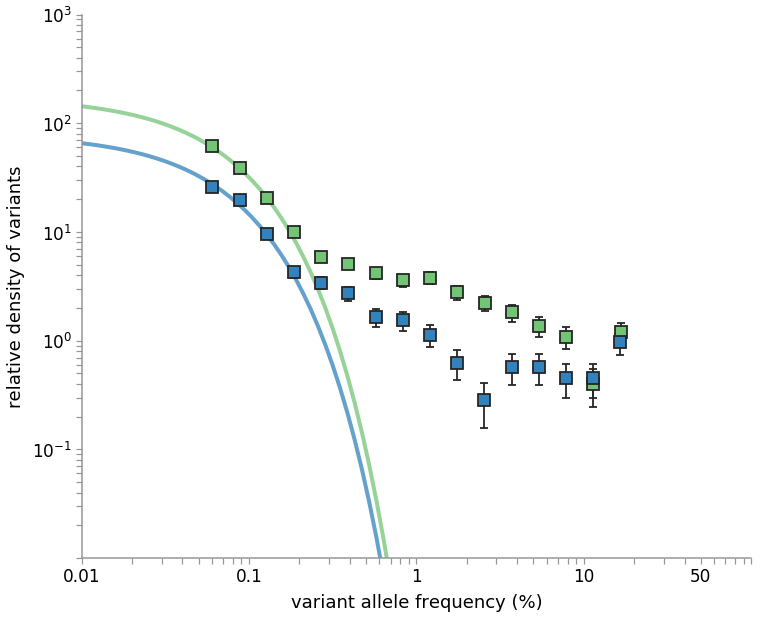

In [39]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(12, 10))



x=np.linspace(-10, np.log(1), 100)

# not rescaled
plot_log_hist_data_for_plot_solid_smaller(Razavi_missense_trimmed_list, Razavitotal, 1, Razavi_missense_bins, \
                            '', Razavimissensemarker, Razavimarkersize, green3)
plot_log_hist_data_for_plot_solid_smaller(Razavi_synonymous_trimmed_list, Razavitotal, 1, Razavi_synonymous_bins, \
                            '', Razavimarker, Razavimarkersize, blue4)

legend_marker_size = 8*scale
legend_elements = [Line2D([0], [0], marker = Razavimarker, color=neutralcolor, alpha=1, markersize = legend_marker_size*1.2, \
                          lw=0, label='Razavi 2019 synonymous SNVs'),
                   Line2D([0], [0], marker = Razavimissensemarker, color='maroon', alpha=1, markersize = legend_marker_size*1.2, \
                          lw=0, label='Razavi 2019 missense SNVs'),
                   Line2D([0], [0], linestyle='--', color='black', alpha=0.75,  \
                          lw=4, label='missense drift'),
                     Line2D([0], [0], color='black', alpha=0.75,  \
                          lw=4, label='neutral drift'),
                  ]


neutral_single_y_synonymous=[logProbtheory_actual_ages_single(l, inferred_N_tau_drift, list_of_control_ages_Razavi, inferred_syn_mut) for l in x]
neutral_single_y_missense=[logProbtheory_actual_ages_single(l, inferred_N_tau_drift, list_of_control_ages_Razavi, inferred_missense_mut) for l in x]

ax1.plot(x, neutral_single_y_synonymous, zorder=0, c = blue4, lw = 4, alpha = 0.75, label= 'neutral drift')
ax1.plot(x, neutral_single_y_missense, zorder=0, c = green3, lw = 4,  alpha = 0.75, label= 'missense drift')

# plt.savefig('Razavi_fitted_synonymous_missense_with_drift_population_size_estimate.pdf', bbox_inches='tight')
